In [ ]:
"""
link to a paper for learning rate: https://www.mdpi.com/1999-5903/12/9/141?utm_source=researchgate
"""

In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import os
import shutil
from pathlib import Path
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
import pandas as pd
from pathlib import Path
from PIL import Image

MAIN_FOLDER = 'Freshwater Fish Disease Aquaculture in south asia' 
# Supported image extensions
IMAGE_EXTENSIONS = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif', '.webp']

def scan_image_folders(main_folder):
    data = []
    subfolders = [f for f in os.listdir(main_folder) 
                  if os.path.isdir(os.path.join(main_folder, f))]
    
    print(f"Found {len(subfolders)} disease categories:")
    for folder in subfolders:
        print(f"  - {folder}")
    
    print("\nScanning images...")
    
    # Scan each subfolder
    for folder_name in subfolders:
        folder_path = os.path.join(main_folder, folder_name)
        
        # Get all image files in this folder
        image_files = [f for f in os.listdir(folder_path) 
                      if os.path.isfile(os.path.join(folder_path, f)) and 
                      os.path.splitext(f)[1].lower() in IMAGE_EXTENSIONS]
        
        print(f"  {folder_name}: {len(image_files)} images")
        
        # Add to dataset
        for image_file in image_files:
            image_path = os.path.join(folder_path, image_file)
            data.append({
                'Folder Name': folder_name,
                'Image Filename': image_file,
                'Image Path': image_path
            })
    
    return pd.DataFrame(data)

# Create dataset from folders
df = scan_image_folders(MAIN_FOLDER)

print("\n" + "="*60)
print("DATASET CREATED FROM FOLDERS")
print("="*60)
print(f"Total images found: {len(df)}")
print(f"Total categories: {df['Folder Name'].nunique()}")
print("\nDataset preview:")
print(df.head(10))

Found 7 disease categories:
  - Bacterial diseases - Aeromoniasis
  - Bacterial gill disease
  - Bacterial Red disease
  - Fungal diseases Saprolegniasis
  - Healthy Fish
  - Parasitic diseases
  - Viral diseases White tail disease

Scanning images...
  Bacterial diseases - Aeromoniasis: 250 images
  Bacterial gill disease: 250 images
  Bacterial Red disease: 250 images
  Fungal diseases Saprolegniasis: 250 images
  Healthy Fish: 250 images
  Parasitic diseases: 250 images
  Viral diseases White tail disease: 250 images

DATASET CREATED FROM FOLDERS
Total images found: 1750
Total categories: 7

Dataset preview:
                         Folder Name  \
0  Bacterial diseases - Aeromoniasis   
1  Bacterial diseases - Aeromoniasis   
2  Bacterial diseases - Aeromoniasis   
3  Bacterial diseases - Aeromoniasis   
4  Bacterial diseases - Aeromoniasis   
5  Bacterial diseases - Aeromoniasis   
6  Bacterial diseases - Aeromoniasis   
7  Bacterial diseases - Aeromoniasis   
8  Bacterial diseases

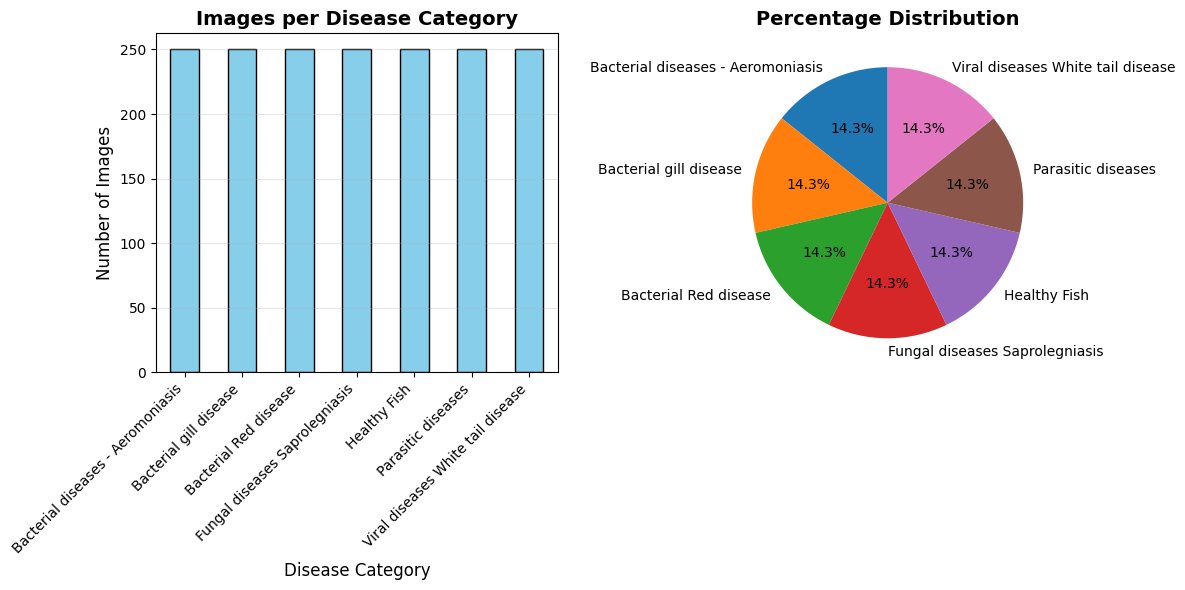


Category Distribution:
Folder Name
Bacterial diseases - Aeromoniasis    250
Bacterial gill disease               250
Bacterial Red disease                250
Fungal diseases Saprolegniasis       250
Healthy Fish                         250
Parasitic diseases                   250
Viral diseases White tail disease    250
Name: count, dtype: int64

Total: 1750 images across 7 categories


In [4]:
import matplotlib.pyplot as plt
category_counts = df['Folder Name'].value_counts()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Images per Disease Category', fontsize=14, fontweight='bold')
plt.xlabel('Disease Category', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('class_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nCategory Distribution:")
print(category_counts)
print(f"\nTotal: {len(df)} images across {len(category_counts)} categories")

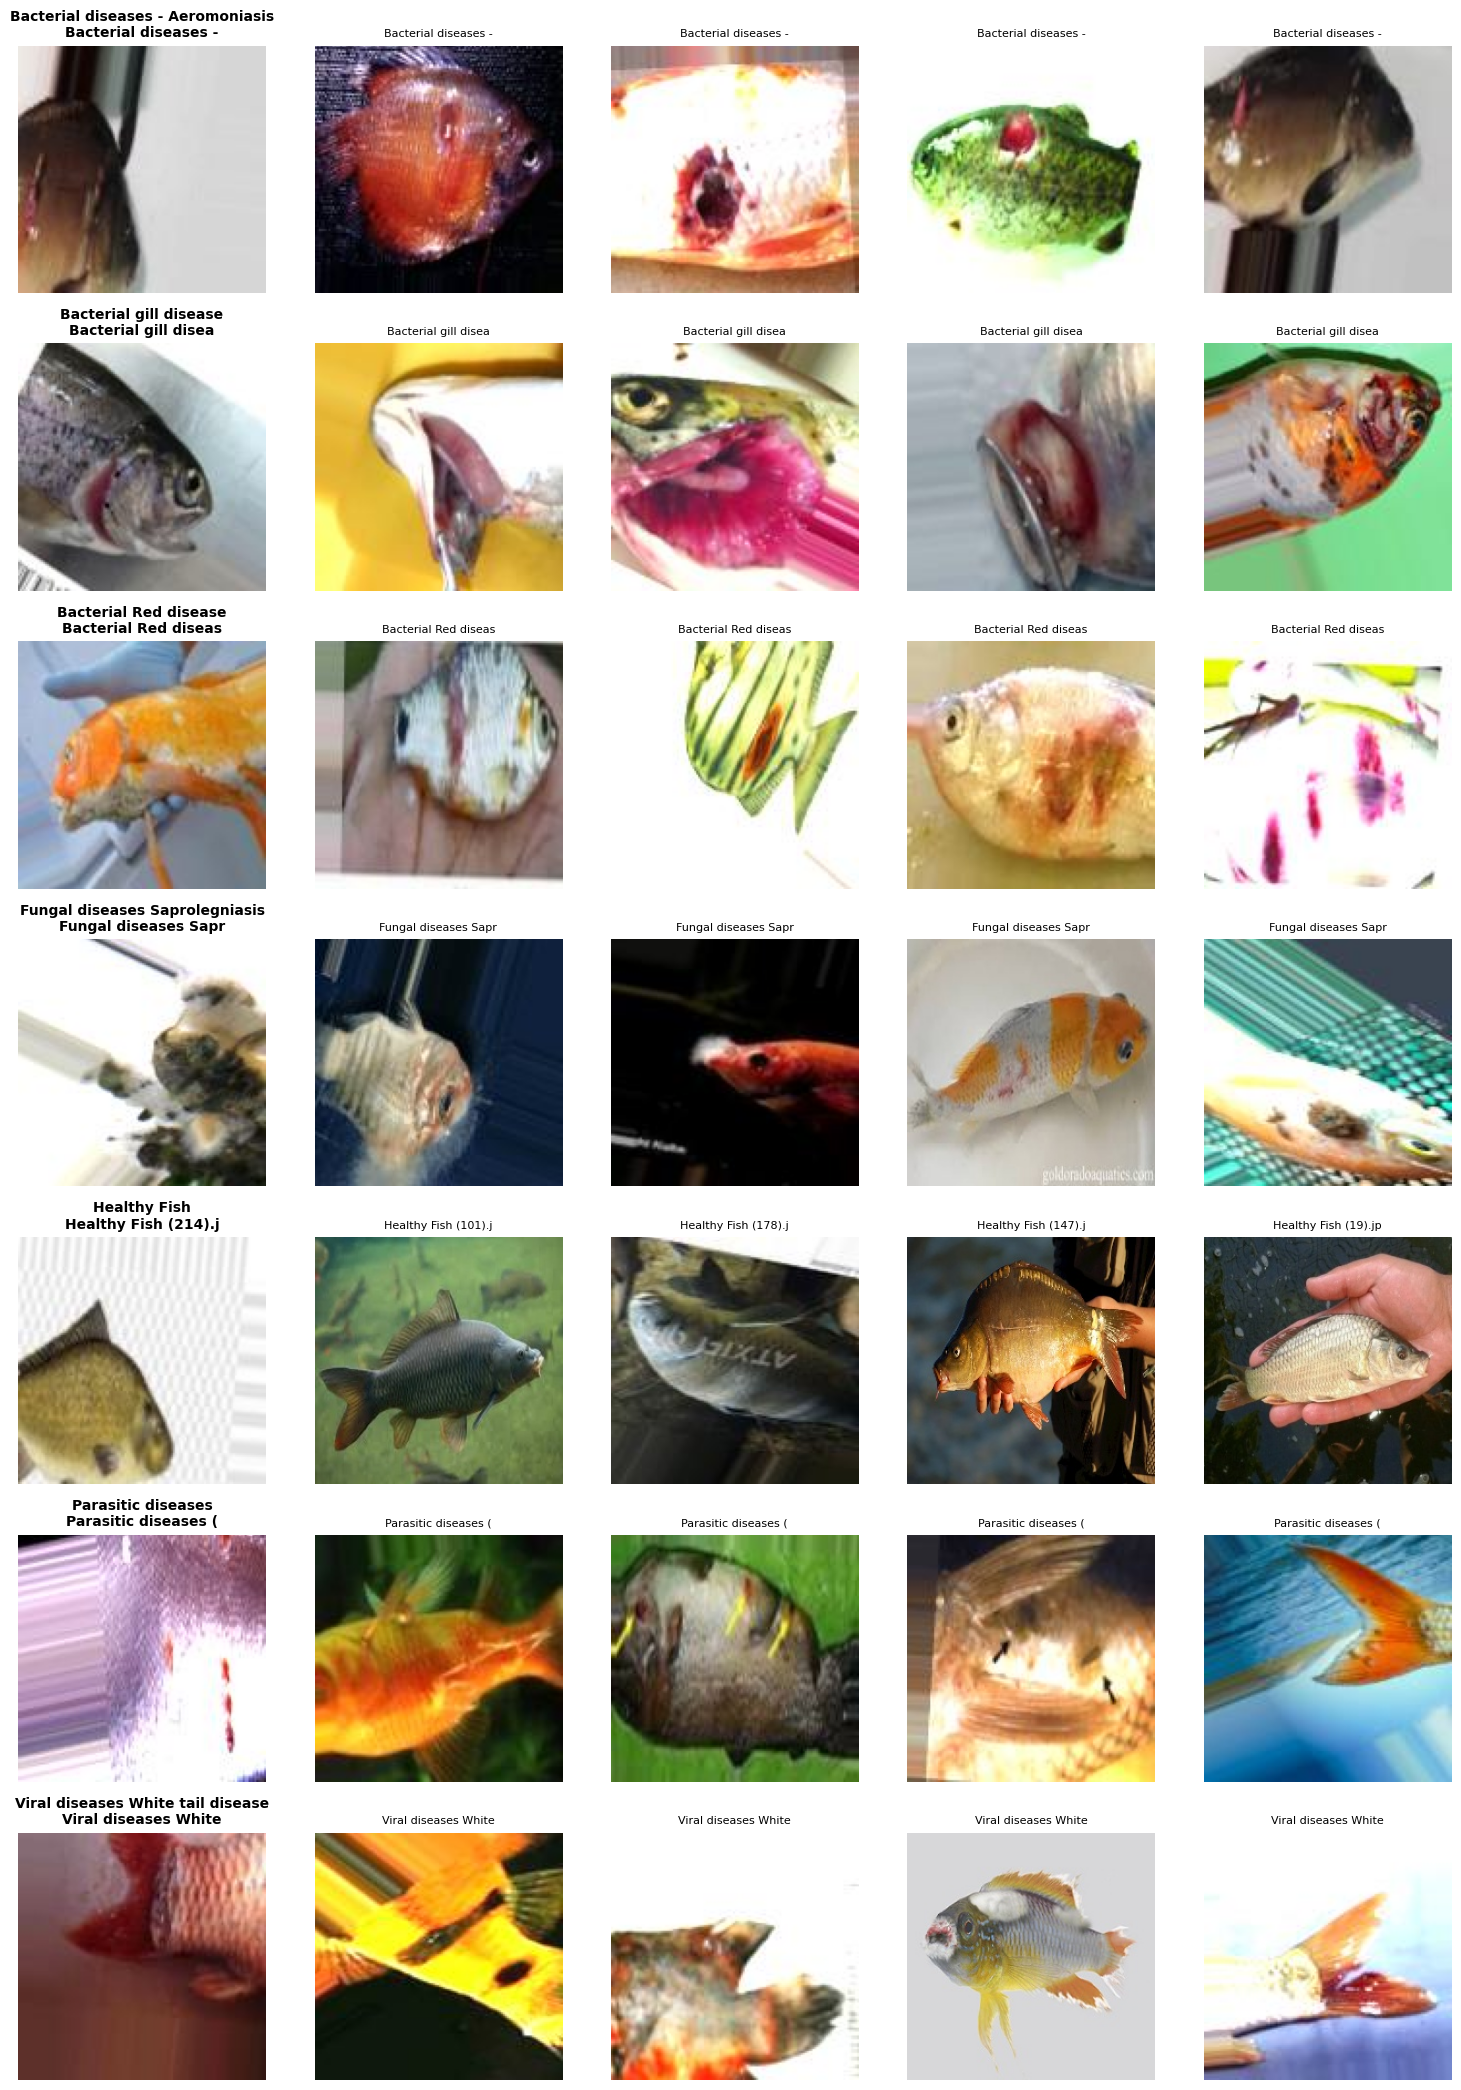

In [5]:
# Display sample images from each category
categories = df['Folder Name'].unique()
n_samples = min(5, df.groupby('Folder Name').size().min())

fig, axes = plt.subplots(len(categories), n_samples, figsize=(15, 3*len(categories)))

if len(categories) == 1:
    axes = axes.reshape(1, -1)
for i, category in enumerate(categories):
    category_df = df[df['Folder Name'] == category].sample(n=n_samples, random_state=42)
    
    for j, (idx, row) in enumerate(category_df.iterrows()):
        try:
            img = Image.open(row['Image Path'])
            
            if len(categories) > 1:
                ax = axes[i, j]
            else:
                ax = axes[j]
            
            ax.imshow(img)
            ax.axis('off')
            
            if j == 0:
                ax.set_title(f"{category}\n{row['Image Filename'][:20]}", 
                           fontsize=10, fontweight='bold')
            else:
                ax.set_title(row['Image Filename'][:20], fontsize=8)
        except Exception as e:
            print(f"Error displaying {row['Image Path']}: {e}")

plt.tight_layout()
plt.savefig('disease_samples.png', dpi=150, bbox_inches='tight')
plt.show()


In [6]:
# Save the clean dataset
output_csv = 'fish_disease_dataset_clean.csv'
df.to_csv(output_csv, index=False)

print(f"Clean dataset saved to: {output_csv}")
print(f"\nDataset Info:")
print(f"  - Total images: {len(df)}")
print(f"  - Categories: {df['Folder Name'].nunique()}")
print(f"  - Columns: {list(df.columns)}")

print("\nFirst few rows:")
print(df.head())

Clean dataset saved to: fish_disease_dataset_clean.csv

Dataset Info:
  - Total images: 1750
  - Categories: 7
  - Columns: ['Folder Name', 'Image Filename', 'Image Path']

First few rows:
                         Folder Name  \
0  Bacterial diseases - Aeromoniasis   
1  Bacterial diseases - Aeromoniasis   
2  Bacterial diseases - Aeromoniasis   
3  Bacterial diseases - Aeromoniasis   
4  Bacterial diseases - Aeromoniasis   

                                Image Filename  \
0   Bacterial diseases - Aeromoniasis (1).jpeg   
1    Bacterial diseases - Aeromoniasis (1).jpg   
2    Bacterial diseases - Aeromoniasis (1).png   
3   Bacterial diseases - Aeromoniasis (10).jpg   
4  Bacterial diseases - Aeromoniasis (100).jpg   

                                          Image Path  
0  Freshwater Fish Disease Aquaculture in south a...  
1  Freshwater Fish Disease Aquaculture in south a...  
2  Freshwater Fish Disease Aquaculture in south a...  
3  Freshwater Fish Disease Aquaculture in south a

In [7]:
import os
import pandas as pd
from pathlib import Path
from PIL import Image

# CONFIGURE THIS: Set your main folder path
MAIN_FOLDER = 'Test'  # e.g., 'fish_disease_images'
IMAGE_EXTENSIONS = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif', '.webp']

def scan_image_folders(main_folder):
    data = []
    # Get all subfolders (disease categories)
    subfolders = [f for f in os.listdir(main_folder) 
                  if os.path.isdir(os.path.join(main_folder, f))]
    
    print(f"Found {len(subfolders)} disease categories:")
    for folder in subfolders:
        print(f"  - {folder}")    
    # Scan each subfolder
    for folder_name in subfolders:
        folder_path = os.path.join(main_folder, folder_name)
        
        # Get all image files in this folder
        image_files = [f for f in os.listdir(folder_path) 
                      if os.path.isfile(os.path.join(folder_path, f)) and 
                      os.path.splitext(f)[1].lower() in IMAGE_EXTENSIONS]
        
        print(f"  {folder_name}: {len(image_files)} images")
        
        # Add to dataset
        for image_file in image_files:
            image_path = os.path.join(folder_path, image_file)
            data.append({
                'Folder Name': folder_name,
                'Image Filename': image_file,
                'Image Path': image_path
            })
    
    return pd.DataFrame(data)

# Create dataset from folders
df = scan_image_folders(MAIN_FOLDER)
print("\n" + "="*60)
print("DATASET CREATED FROM FOLDERS")
print("="*60)
print(f"Total images found: {len(df)}")
print(f"Total categories: {df['Folder Name'].nunique()}")
print("\nDataset preview:")
print(df.head(5))
output_csv = 'Test.csv'
df.to_csv(output_csv, index=False)

Found 7 disease categories:
  - Bacterial diseases - Aeromoniasis
  - Bacterial gill disease
  - Bacterial Red disease
  - Fungal diseases Saprolegniasis
  - Healthy Fish
  - Parasitic diseases
  - Viral diseases White tail disease
  Bacterial diseases - Aeromoniasis: 100 images
  Bacterial gill disease: 100 images
  Bacterial Red disease: 100 images
  Fungal diseases Saprolegniasis: 100 images
  Healthy Fish: 100 images
  Parasitic diseases: 100 images
  Viral diseases White tail disease: 100 images

DATASET CREATED FROM FOLDERS
Total images found: 700
Total categories: 7

Dataset preview:
                         Folder Name  \
0  Bacterial diseases - Aeromoniasis   
1  Bacterial diseases - Aeromoniasis   
2  Bacterial diseases - Aeromoniasis   
3  Bacterial diseases - Aeromoniasis   
4  Bacterial diseases - Aeromoniasis   

                                Image Filename  \
0   Bacterial diseases - Aeromoniasis (1).jpeg   
1    Bacterial diseases - Aeromoniasis (1).jpg   
2    Bacter

In [8]:
train=pd.read_csv("fish_disease_dataset_clean.csv")
test=pd.read_csv("Test.csv")

In [9]:
from tqdm import tqdm
import numpy as np
df=train.copy()
def get_image_info(image_path):
    """Get detailed image information"""
    try:
        img = Image.open(image_path)
        return {
            'width': img.width,
            'height': img.height,
            'mode': img.mode,
            'format': img.format,
            'size_kb': os.path.getsize(image_path) / 1024
        }
    except:
        return {
            'width': None,
            'height': None,
            'mode': None,
            'format': None,
            'size_kb': None
        }

print("Analyzing image properties (sampling 500 images)...")
sample_size = min(500, len(df))
sample_indices = np.random.choice(len(df), sample_size, replace=False)

properties = []
for idx in tqdm(sample_indices):
    img_path = df.iloc[idx]['Image Path']
    properties.append(get_image_info(img_path))

props_df = pd.DataFrame(properties)

print("\n" + "="*60)
print("IMAGE PROPERTIES SUMMARY")
print("="*60)

print("\nImage Formats:")
print(props_df['format'].value_counts())

print("\nColor Modes:")
print(props_df['mode'].value_counts())

print("\nDimensions Statistics:")
print(props_df[['width', 'height', 'size_kb']].describe())

print("\nMost Common Dimensions:")
dims = props_df.groupby(['width', 'height']).size().sort_values(ascending=False).head(5)
print(dims)

Analyzing image properties (sampling 500 images)...


100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 659.18it/s]


IMAGE PROPERTIES SUMMARY

Image Formats:
format
JPEG    491
PNG       8
WEBP      1
Name: count, dtype: int64

Color Modes:
mode
RGB    500
Name: count, dtype: int64

Dimensions Statistics:
            width      height     size_kb
count  500.000000  500.000000  500.000000
mean   153.624000  153.108000    8.565086
std     42.485723   42.607172   12.199204
min    116.000000   62.000000    1.818359
25%    128.000000  128.000000    2.973145
50%    128.000000  128.000000    3.537109
75%    224.000000  224.000000   12.219482
max    224.000000  224.000000   99.105469

Most Common Dimensions:
width  height
128    128       365
224    224       131
116    212         1
184    136         1
224    62          1
dtype: int64


In [10]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageEnhance
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [11]:
train_df = train.copy()  # Update with your actual path
test_df = test.copy()    # Update with your actual path
# Output directories
OUTPUT_DIR = 'preprocessed_images'
MODEL_DIR = 'saved_models'
RESULTS_DIR = 'results'

# Create directories
os.makedirs(OUTPUT_DIR, exist_ok=True)
os.makedirs(MODEL_DIR, exist_ok=True)
os.makedirs(RESULTS_DIR, exist_ok=True)

# Model parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS_PHASE1 = 20
EPOCHS_PHASE2 = 15
LEARNING_RATE_PHASE1 = 0.00166
LEARNING_RATE_PHASE2 = 0.000166


In [12]:
from sklearn.model_selection import train_test_split

print("\n" + "="*70)
print("CREATING VALIDATION SPLIT")
print("="*70)

# Split train into train and validation (80-20 split)
train_data, val_data = train_test_split(
    train_df, 
    test_size=0.2, 
    stratify=train_df['Folder Name'],
    random_state=42
)

print(f"\nTraining samples: {len(train_data)}")
print(f"Validation samples: {len(val_data)}")
print(f"Test samples: {len(test_df)}")

# Create splits dictionary
splits = {
    'train': train_data,
    'val': val_data,
    'test': test_df
}


CREATING VALIDATION SPLIT

Training samples: 1400
Validation samples: 350
Test samples: 700


In [13]:
classes = train_df['Folder Name'].unique()
for split_name in ['train', 'val', 'test']:
    for category in classes:
        dir_path = os.path.join(OUTPUT_DIR, split_name, category)
        os.makedirs(dir_path, exist_ok=True)

In [14]:
def resize_with_padding(img, target_size, pad_color=(0, 0, 0)):
    target_w, target_h = target_size
    img_w, img_h = img.size
    
    # Calculate scale to fit within target size
    scale = min(target_w / img_w, target_h / img_h)
    new_w = int(img_w * scale)
    new_h = int(img_h * scale)
    
    # Resize image
    img_resized = img.resize((new_w, new_h), Image.LANCZOS)
    
    # Create new image with padding
    new_img = Image.new('RGB', target_size, pad_color)
    paste_x = (target_w - new_w) // 2
    paste_y = (target_h - new_h) // 2
    new_img.paste(img_resized, (paste_x, paste_y))
    
    return new_img


def preprocess_image(image_path, target_size=(224, 224), maintain_aspect=True):
    try:
        # Load and convert to RGB
        img = Image.open(image_path)
        if img.mode != 'RGB':
            img = img.convert('RGB')
        
        if maintain_aspect:
            # Resize maintaining aspect ratio with padding
            img = resize_with_padding(img, target_size)
        else:
            # Simple resize (may distort)
            img = img.resize(target_size, Image.LANCZOS)
        
        return img
    
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

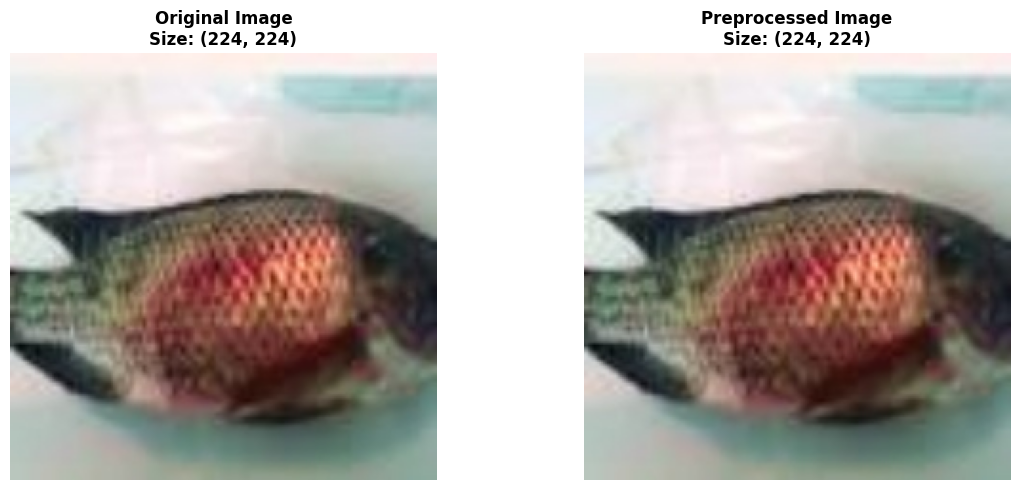

In [15]:
test_img_path = train_df.iloc[0]['Image Path']
test_original = Image.open(test_img_path)
test_processed = preprocess_image(test_img_path, target_size=IMG_SIZE)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(test_original)
axes[0].set_title(f'Original Image\nSize: {test_original.size}', fontweight='bold')
axes[0].axis('off')

axes[1].imshow(test_processed)
axes[1].set_title(f'Preprocessed Image\nSize: {test_processed.size}', fontweight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, 'preprocessing_example.png'), dpi=150, bbox_inches='tight')
plt.show()

In [16]:
for split_name, split_df in splits.items():
    print(f"\n{'='*70}")
    print(f"Processing {split_name.upper()} set ({len(split_df)} images)...")
    print('='*70)
    
    success_count = 0
    fail_count = 0
    failed_images = []
    
    for idx, row in tqdm(split_df.iterrows(), total=len(split_df), desc=f"{split_name}"):
        input_path = row['Image Path']
        category = row['Folder Name']
        filename = row['Image Filename']
        
        # Define output path
        output_path = os.path.join(OUTPUT_DIR, split_name, category, filename)
        
        # Preprocess and save
        img = preprocess_image(input_path, IMG_SIZE, maintain_aspect=True)
        
        if img is not None:
            img.save(output_path, quality=95)
            success_count += 1
        else:
            fail_count += 1
            failed_images.append(input_path)
    
    print(f"\nSuccess: {success_count}")
    if fail_count > 0:
        print(f" Failed: {fail_count}")
print("PREPROCESSING COMPLETE!")


Processing TRAIN set (1400 images)...


train: 100%|██████████████████████████████████████████████████████████████████████| 1400/1400 [00:04<00:00, 301.04it/s]



Success: 1400

Processing VAL set (350 images)...


val: 100%|██████████████████████████████████████████████████████████████████████████| 350/350 [00:01<00:00, 315.12it/s]



Success: 350

Processing TEST set (700 images)...


test: 100%|█████████████████████████████████████████████████████████████████████████| 700/700 [00:02<00:00, 239.79it/s]



Success: 700
PREPROCESSING COMPLETE!


In [17]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

# Validation and test generators (no augmentation, only rescaling)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    os.path.join(OUTPUT_DIR, 'train'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

val_generator = val_test_datagen.flow_from_directory(
    os.path.join(OUTPUT_DIR, 'val'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    os.path.join(OUTPUT_DIR, 'test'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

print("\n" + "="*70)
print("DATA GENERATORS SUMMARY")
print("="*70)
print(f"Training samples:   {train_generator.samples}")
print(f"Validation samples: {val_generator.samples}")
print(f"Test samples:       {test_generator.samples}")
print(f"Number of classes:  {train_generator.num_classes}")
print(f"Batch size:         {BATCH_SIZE}")

print("\nClass indices:")
for class_name, idx in sorted(train_generator.class_indices.items(), key=lambda x: x[1]):
    print(f"  {idx}: {class_name}")

# Save class indices for later use
class_names = {v: k for k, v in train_generator.class_indices.items()}
class_indices_path = os.path.join(MODEL_DIR, 'class_names.json')
with open(class_indices_path, 'w') as f:
    json.dump(class_names, f, indent=4)

Found 1397 images belonging to 7 classes.
Found 350 images belonging to 7 classes.
Found 697 images belonging to 7 classes.

DATA GENERATORS SUMMARY
Training samples:   1397
Validation samples: 350
Test samples:       697
Number of classes:  7
Batch size:         32

Class indices:
  0: Bacterial Red disease
  1: Bacterial diseases - Aeromoniasis
  2: Bacterial gill disease
  3: Fungal diseases Saprolegniasis
  4: Healthy Fish
  5: Parasitic diseases
  6: Viral diseases White tail disease


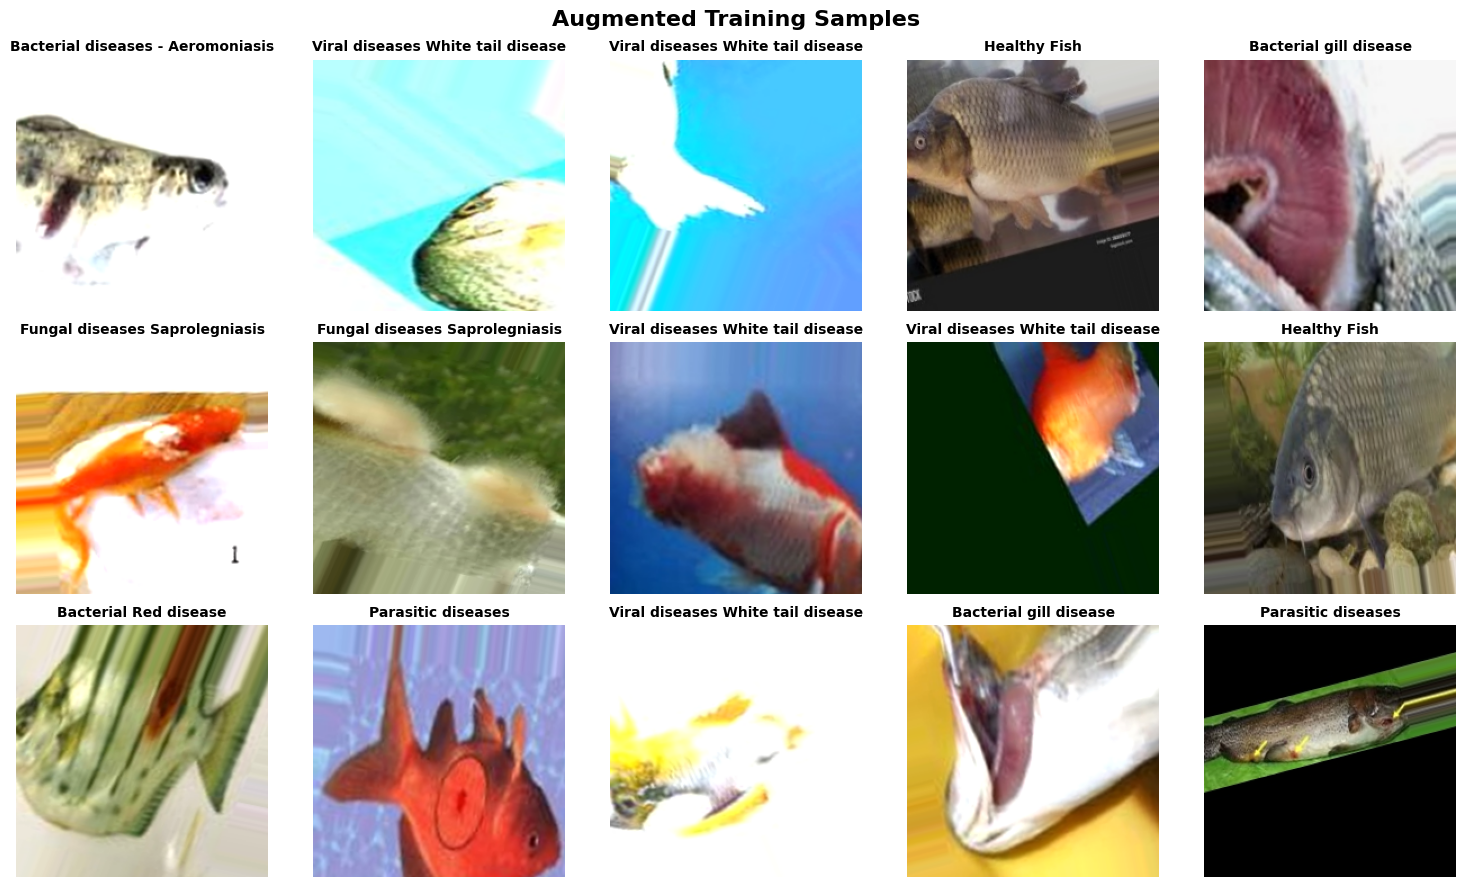


Augmentation preview saved to 'results/augmented_samples.png'


In [18]:
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.flatten()

# Get a batch of augmented images
sample_batch, sample_labels = next(train_generator)

for i in range(15):
    axes[i].imshow(sample_batch[i])
    class_idx = np.argmax(sample_labels[i])
    class_name = class_names[class_idx]
    axes[i].set_title(class_name, fontsize=10, fontweight='bold')
    axes[i].axis('off')

plt.suptitle('Augmented Training Samples', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, 'augmented_samples.png'), dpi=150, bbox_inches='tight')
plt.show()

print(f"\nAugmentation preview saved to '{RESULTS_DIR}/augmented_samples.png'")
train_generator.reset()

In [19]:
NUM_CLASSES = len(classes)
def create_model(num_classes, input_shape=(224, 224, 3)):
    # Load pre-trained MobileNetV2 (without top layers)
    base_model = MobileNetV2(
        input_shape=input_shape,
        include_top=False,
        weights='imagenet'
    )
    
    # Freeze base model initially
    base_model.trainable = False
    
    # Build custom top layers
    model = keras.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ], name='Fish_Disease_Classifier')
    
    return model, base_model

print("\n" + "="*70)
print("BUILDING MODEL")
print("="*70)

# Create model
model, base_model = create_model(NUM_CLASSES, input_shape=(*IMG_SIZE, 3))

# Compile model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE_PHASE1),
    loss='categorical_crossentropy',
    metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()]
)

# Display architecture
print("\n--- MODEL ARCHITECTURE ---")
model.summary()

print(f"\nModel created successfully!")
print(f"   Total parameters: {model.count_params():,}")
trainable_params = sum([tf.size(w).numpy() for w in model.trainable_weights])
print(f"   Trainable parameters: {trainable_params:,}")
print(f"   Non-trainable parameters: {model.count_params() - trainable_params:,}")



BUILDING MODEL

--- MODEL ARCHITECTURE ---


Model: "Fish_Disease_Classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,587,719 (9.87 MB)

 Trainable params: 329,735 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)


Model created successfully!
   Total parameters: 2,587,719
   Trainable parameters: 329,735
   Non-trainable parameters: 2,257,984


In [20]:
callbacks = [
    # Early stopping
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),
    
    # Reduce learning rate on plateau
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-7,
        verbose=1
    ),
    
    # Save best model during training
    ModelCheckpoint(
        os.path.join(MODEL_DIR, 'best_model_checkpoint.h5'),
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

In [21]:
print("\n" + "="*70)
print("TRAINING PHASE 1: Transfer Learning (Frozen Base)")
print("="*70)
print(f"Epochs: {EPOCHS_PHASE1}")
print(f"Learning Rate: {LEARNING_RATE_PHASE1}")
print(f"Base model frozen: Yes")

history_phase1 = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS_PHASE1,
    callbacks=callbacks,
    verbose=1
)


TRAINING PHASE 1: Transfer Learning (Frozen Base)
Epochs: 20
Learning Rate: 0.00166
Base model frozen: Yes
Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 939ms/step - accuracy: 0.2795 - loss: 2.2481 - precision: 0.3513 - recall: 0.1336
Epoch 1: val_accuracy improved from None to 0.58000, saving model to saved_models\best_model_checkpoint.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.3658 - loss: 1.8074 - precision: 0.5069 - recall: 0.1847 - val_accuracy: 0.5800 - val_loss: 1.2209 - val_precision: 0.7500 - val_recall: 0.3514 - learning_rate: 0.0017
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 588ms/step - accuracy: 0.5087 - loss: 1.3525 - precision: 0.6667 - recall: 0.3273
Epoch 2: val_accuracy improved from 0.58000 to 0.67714, saving model to saved_models\best_model_checkpoint.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 31s 695ms/step - accuracy: 0.5304 - loss: 1.2868 - precision: 0.6948 - recall: 0.3422 - val_accuracy: 0.6771 - val_loss: 0.9952 - val_precision: 0.8406 - val_recall: 0.4971 - learning_rate: 0.0017
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 612ms/step - accuracy: 0.5955 - loss: 1.1322 - precision: 0.7581 - recall: 0.4629
Epoch 3: val_accuracy improved from 0.67714 to 0.70000, saving model to saved_models\best_model_checkpoint.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 32s 717ms/step - accuracy: 0.5948 - loss: 1.1233 - precision: 0.7494 - recall: 0.4538 - val_accuracy: 0.7000 - val_loss: 0.9193 - val_precision: 0.8592 - val_recall: 0.5229 - learning_rate: 0.0017
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 580ms/step - accuracy: 0.6254 - loss: 1.0433 - precision: 0.7475 - recall: 0.4822
Epoch 4: val_accuracy improved from 0.70000 to 0.73143, saving model to saved_models\best_model_checkpoint.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 30s 685ms/step - accuracy: 0.6399 - loss: 1.0182 - precision: 0.7625 - recall: 0.4918 - val_accuracy: 0.7314 - val_loss: 0.8079 - val_precision: 0.8874 - val_recall: 0.5629 - learning_rate: 0.0017
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 642ms/step - accuracy: 0.6493 - loss: 0.9206 - precision: 0.7865 - recall: 0.5313
Epoch 5: val_accuracy did not improve from 0.73143
44/44 ━━━━━━━━━━━━━━━━━━━━ 33s 742ms/step - accuracy: 0.6428 - loss: 0.9699 - precision: 0.7605 - recall: 0.5204 - val_accuracy: 0.7314 - val_loss: 0.7375 - val_precision: 0.8870 - val_recall: 0.6057 - learning_rate: 0.0017
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 579ms/step - accuracy: 0.7243 - loss: 0.8025 - precision: 0.8317 - recall: 0.5999
Epoch 6: val_accuracy improved from 0.73143 to 0.74571, saving model to saved_models\best_model_checkpoint.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 30s 679ms/step - accuracy: 0.7137 - loss: 0.8338 - precision: 0.8164 - recall: 0.5984 - val_accuracy: 0.7457 - val_loss: 0.7031 - val_precision: 0.8696 - val_recall: 0.6286 - learning_rate: 0.0017
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 585ms/step - accuracy: 0.7031 - loss: 0.8096 - precision: 0.8128 - recall: 0.6095
Epoch 7: val_accuracy improved from 0.74571 to 0.79143, saving model to saved_models\best_model_checkpoint.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 30s 686ms/step - accuracy: 0.7051 - loss: 0.8065 - precision: 0.8184 - recall: 0.6163 - val_accuracy: 0.7914 - val_loss: 0.6355 - val_precision: 0.9074 - val_recall: 0.7000 - learning_rate: 0.0017
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 570ms/step - accuracy: 0.7081 - loss: 0.8058 - precision: 0.8233 - recall: 0.6124
Epoch 8: val_accuracy improved from 0.79143 to 0.80857, saving model to saved_models\best_model_checkpoint.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 30s 672ms/step - accuracy: 0.7130 - loss: 0.7911 - precision: 0.8192 - recall: 0.6163 - val_accuracy: 0.8086 - val_loss: 0.5907 - val_precision: 0.9088 - val_recall: 0.7114 - learning_rate: 0.0017
Epoch 9/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 614ms/step - accuracy: 0.7762 - loss: 0.6685 - precision: 0.8509 - recall: 0.6835
Epoch 9: val_accuracy improved from 0.80857 to 0.82000, saving model to saved_models\best_model_checkpoint.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 32s 717ms/step - accuracy: 0.7566 - loss: 0.7157 - precision: 0.8359 - recall: 0.6564 - val_accuracy: 0.8200 - val_loss: 0.5984 - val_precision: 0.8961 - val_recall: 0.7143 - learning_rate: 0.0017
Epoch 10/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 561ms/step - accuracy: 0.7526 - loss: 0.6709 - precision: 0.8346 - recall: 0.6797
Epoch 10: val_accuracy did not improve from 0.82000
44/44 ━━━━━━━━━━━━━━━━━━━━ 29s 655ms/step - accuracy: 0.7373 - loss: 0.7181 - precision: 0.8150 - recall: 0.6593 - val_accuracy: 0.7943 - val_loss: 0.6204 - val_precision: 0.8834 - val_recall: 0.7143 - learning_rate: 0.0017
Epoch 11/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 558ms/step - accuracy: 0.7753 - loss: 0.6711 - precision: 0.8429 - recall: 0.6846
Epoch 11: val_accuracy improved from 0.82000 to 0.82571, saving model to saved_models\best_model_checkpoint.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 29s 657ms/step - accuracy: 0.7702 - loss: 0.6777 - precision: 0.8448 - recall: 0.6779 - val_accuracy: 0.8257 - val_loss: 0.5224 - val_precision: 0.9132 - val_recall: 0.7514 - learning_rate: 0.0017
Epoch 12/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 555ms/step - accuracy: 0.7731 - loss: 0.6443 - precision: 0.8332 - recall: 0.6918
Epoch 12: val_accuracy improved from 0.82571 to 0.84571, saving model to saved_models\best_model_checkpoint.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 29s 654ms/step - accuracy: 0.7724 - loss: 0.6400 - precision: 0.8405 - recall: 0.6979 - val_accuracy: 0.8457 - val_loss: 0.4904 - val_precision: 0.9184 - val_recall: 0.7714 - learning_rate: 0.0017
Epoch 13/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 578ms/step - accuracy: 0.7976 - loss: 0.5867 - precision: 0.8744 - recall: 0.7233
Epoch 13: val_accuracy did not improve from 0.84571
44/44 ━━━━━━━━━━━━━━━━━━━━ 30s 672ms/step - accuracy: 0.7946 - loss: 0.6001 - precision: 0.8536 - recall: 0.7094 - val_accuracy: 0.8286 - val_loss: 0.4943 - val_precision: 0.9051 - val_recall: 0.7629 - learning_rate: 0.0017
Epoch 14/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 575ms/step - accuracy: 0.8046 - loss: 0.5436 - precision: 0.8662 - recall: 0.7635
Epoch 14: val_accuracy did not improve from 0.84571
44/44 ━━━━━━━━━━━━━━━━━━━━ 30s 675ms/step - accuracy: 0.7802 - loss: 0.6083 - precision: 0.8478 - recall: 0.7337 - val_accuracy: 0.8171 - val_loss: 0.4818 - val_precision: 0.9044 - val_recall: 0.7571 

44/44 ━━━━━━━━━━━━━━━━━━━━ 32s 715ms/step - accuracy: 0.8125 - loss: 0.5359 - precision: 0.8566 - recall: 0.7523 - val_accuracy: 0.8486 - val_loss: 0.4605 - val_precision: 0.8893 - val_recall: 0.7800 - learning_rate: 0.0017
Epoch 18/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 592ms/step - accuracy: 0.7973 - loss: 0.5405 - precision: 0.8602 - recall: 0.7493
Epoch 18: val_accuracy did not improve from 0.84857
44/44 ━━━━━━━━━━━━━━━━━━━━ 30s 685ms/step - accuracy: 0.8039 - loss: 0.5238 - precision: 0.8644 - recall: 0.7573 - val_accuracy: 0.8486 - val_loss: 0.4386 - val_precision: 0.9046 - val_recall: 0.7857 - learning_rate: 0.0017
Epoch 19/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 555ms/step - accuracy: 0.8298 - loss: 0.4980 - precision: 0.8769 - recall: 0.7753
Epoch 19: val_accuracy improved from 0.84857 to 0.88000, saving model to saved_models\best_model_checkpoint.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 29s 654ms/step - accuracy: 0.8346 - loss: 0.4916 - precision: 0.8738 - recall: 0.7881 - val_accuracy: 0.8800 - val_loss: 0.4119 - val_precision: 0.9272 - val_recall: 0.8000 - learning_rate: 0.0017
Epoch 20/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 589ms/step - accuracy: 0.8431 - loss: 0.4791 - precision: 0.8898 - recall: 0.7785
Epoch 20: val_accuracy did not improve from 0.88000
44/44 ━━━━━━━━━━━━━━━━━━━━ 30s 687ms/step - accuracy: 0.8232 - loss: 0.4914 - precision: 0.8757 - recall: 0.7717 - val_accuracy: 0.8600 - val_loss: 0.3994 - val_precision: 0.9038 - val_recall: 0.8057 - learning_rate: 0.0017
Restoring model weights from the end of the best epoch: 20.


In [22]:
print("\n" + "="*70)
print("TRAINING PHASE 2: Fine-tuning")
print("="*70)

# Unfreeze base model for fine-tuning
base_model.trainable = True

# Freeze early layers, unfreeze later layers (last 30)
trainable_layers = 0
for layer in base_model.layers[:-30]:
    layer.trainable = False
    
for layer in base_model.layers[-30:]:
    if layer.trainable:
        trainable_layers += 1

print(f"Unfrozen layers in base model: {trainable_layers}")

# Recompile with lower learning rate
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE_PHASE2),
    loss='categorical_crossentropy',
    metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()]
)

trainable_params = sum([tf.size(w).numpy() for w in model.trainable_weights])
print(f"Trainable parameters: {trainable_params:,}")
print(f"Learning Rate: {LEARNING_RATE_PHASE2}")

# Continue training
history_phase2 = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS_PHASE2,
    callbacks=callbacks,
    initial_epoch=len(history_phase1.history['loss']),
    verbose=1
)


TRAINING PHASE 2: Fine-tuning
Unfrozen layers in base model: 30
Trainable parameters: 1,856,135
Learning Rate: 0.000166



PLOTTING TRAINING HISTORY

=== DEBUG INFO ===
Phase 1 type: <class 'keras.src.callbacks.history.History'>
Phase 1 has history: True
Phase 1 metrics: ['accuracy', 'loss', 'precision', 'recall', 'val_accuracy', 'val_loss', 'val_precision', 'val_recall', 'learning_rate']
Phase 1 epochs: 20

Phase 2 type: <class 'keras.src.callbacks.history.History'>
Phase 2 has history: True
Phase 2 metrics: []
Phase 2 epochs: 0


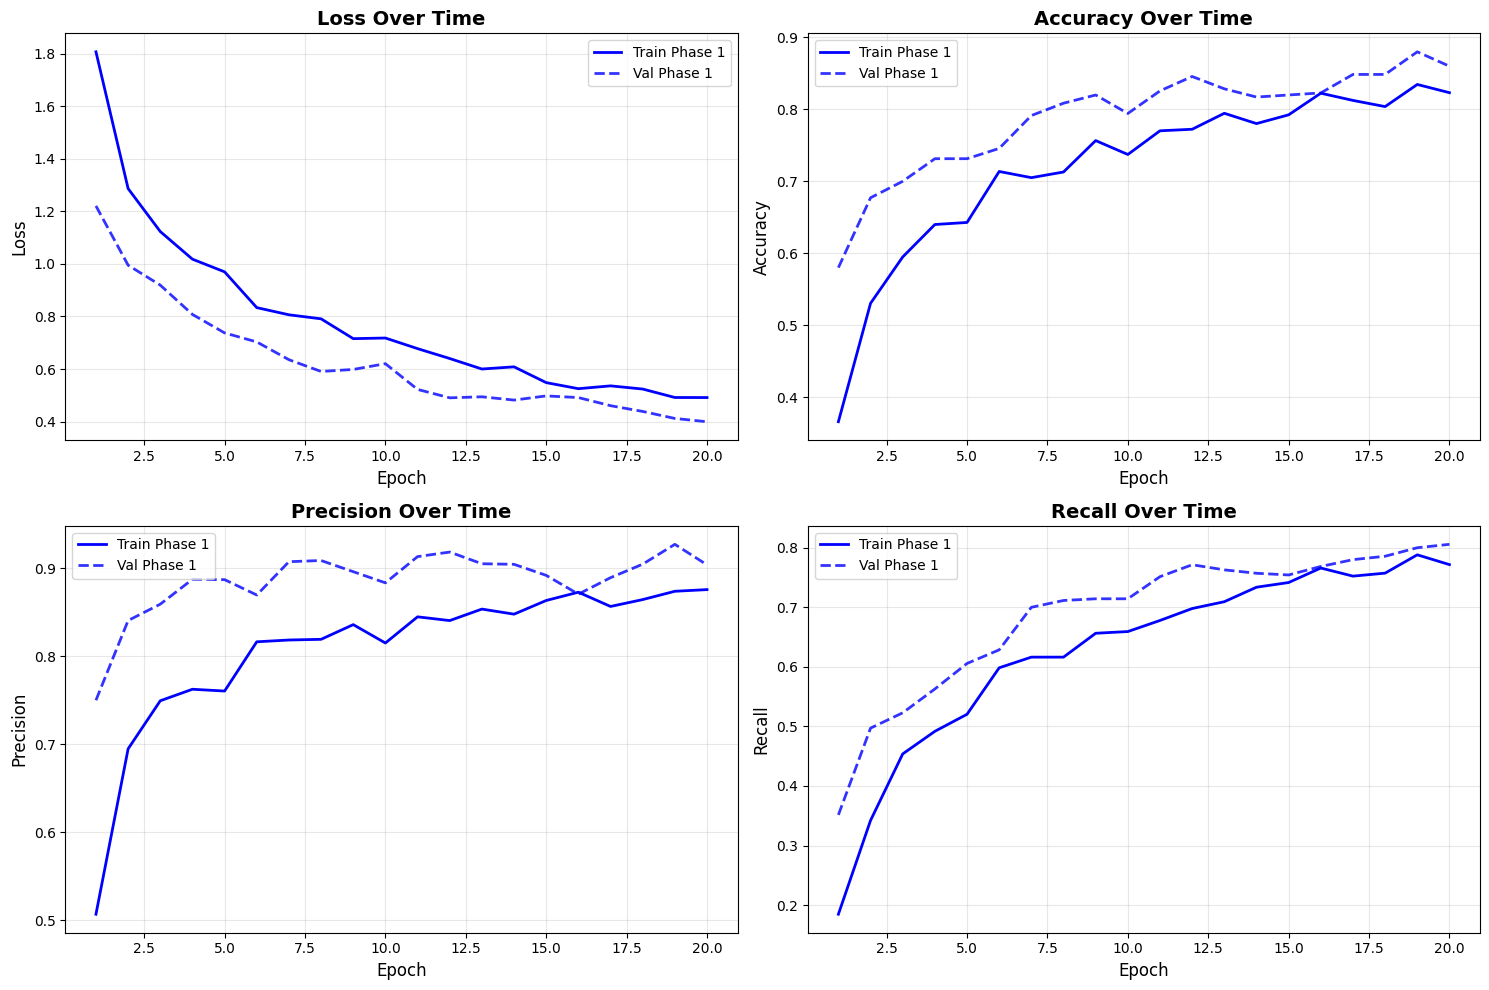


✅ Training history saved to 'results/training_history.png'


In [23]:
# ============================================================================
# CELL 16: Plot Training History (FIXED VERSION)
# ============================================================================
def plot_training_history(history1, history2, save_path):
    """Plot training and validation metrics for both phases"""
    
    metrics = ['loss', 'accuracy', 'precision', 'recall']
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()
    
    for idx, metric in enumerate(metrics):
        ax = axes[idx]
        
        # Phase 1 - always plot this
        if metric in history1.history:
            epochs1 = range(1, len(history1.history[metric]) + 1)
            ax.plot(epochs1, history1.history[metric], 'b-', 
                    label='Train Phase 1', linewidth=2)
            ax.plot(epochs1, history1.history[f'val_{metric}'], 'b--', 
                    label='Val Phase 1', linewidth=2, alpha=0.8)
        
        # Phase 2 - only plot if it exists and has data
        if history2 is not None:
            try:
                if hasattr(history2, 'history') and metric in history2.history:
                    if len(history2.history[metric]) > 0:
                        phase1_len = len(history1.history[metric])
                        epochs2 = range(phase1_len + 1, 
                                      phase1_len + len(history2.history[metric]) + 1)
                        ax.plot(epochs2, history2.history[metric], 'r-', 
                                label='Train Phase 2', linewidth=2)
                        ax.plot(epochs2, history2.history[f'val_{metric}'], 'r--', 
                                label='Val Phase 2', linewidth=2, alpha=0.8)
                        
                        # Add vertical line to mark phase transition
                        ax.axvline(x=phase1_len, color='gray', linestyle=':', 
                                  linewidth=2, alpha=0.5, label='Phase Transition')
            except (KeyError, AttributeError) as e:
                print(f"Warning: Could not plot Phase 2 for {metric}: {e}")
        
        ax.set_xlabel('Epoch', fontsize=12)
        ax.set_ylabel(metric.capitalize(), fontsize=12)
        ax.set_title(f'{metric.capitalize()} Over Time', 
                    fontsize=14, fontweight='bold')
        ax.legend(loc='best')
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(save_path, dpi=150, bbox_inches='tight')
    plt.show()

print("\n" + "="*70)
print("PLOTTING TRAINING HISTORY")
print("="*70)

# Debug information
print("\n=== DEBUG INFO ===")
print(f"Phase 1 type: {type(history_phase1)}")
print(f"Phase 1 has history: {hasattr(history_phase1, 'history')}")
if hasattr(history_phase1, 'history'):
    print(f"Phase 1 metrics: {list(history_phase1.history.keys())}")
    print(f"Phase 1 epochs: {len(history_phase1.history.get('loss', []))}")

print(f"\nPhase 2 type: {type(history_phase2)}")
print(f"Phase 2 has history: {hasattr(history_phase2, 'history')}")
if hasattr(history_phase2, 'history'):
    print(f"Phase 2 metrics: {list(history_phase2.history.keys())}")
    print(f"Phase 2 epochs: {len(history_phase2.history.get('loss', []))}")
else:
    print("Phase 2: No data available")
print("=" * 50)

# Plot the history
plot_training_history(
    history_phase1, 
    history_phase2,
    os.path.join(RESULTS_DIR, 'training_history.png')
)

print(f"\n✅ Training history saved to '{RESULTS_DIR}/training_history.png'")

In [24]:
print("\n" + "="*70)
print("EVALUATING ON TEST SET")
print("="*70)

# Evaluate model
test_results = model.evaluate(test_generator, verbose=1)
test_loss, test_accuracy, test_precision, test_recall = test_results

# Calculate F1 score
test_f1 = 2 * (test_precision * test_recall) / (test_precision + test_recall)

print("\n" + "="*70)
print("TEST SET RESULTS")
print("="*70)
print(f"Loss:      {test_loss:.4f}")
print(f"Accuracy:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Precision: {test_precision:.4f}")
print(f"Recall:    {test_recall:.4f}")
print(f"F1-Score:  {test_f1:.4f}")
print("="*70)

# Save results to file
results_dict = {
    'test_loss': float(test_loss),
    'test_accuracy': float(test_accuracy),
    'test_precision': float(test_precision),
    'test_recall': float(test_recall),
    'test_f1_score': float(test_f1)
}

results_path = os.path.join(RESULTS_DIR, 'test_results.json')
with open(results_path, 'w') as f:
    json.dump(results_dict, f, indent=4)


EVALUATING ON TEST SET
22/22 ━━━━━━━━━━━━━━━━━━━━ 17s 664ms/step - accuracy: 0.9211 - loss: 0.2495 - precision_1: 0.9495 - recall_1: 0.8895

TEST SET RESULTS
Loss:      0.2495
Accuracy:  0.9211 (92.11%)
Precision: 0.9495
Recall:    0.8895
F1-Score:  0.9185


In [25]:
print("\n" + "="*70)
print("GENERATING PREDICTIONS")
print("="*70)

# Reset test generator
test_generator.reset()

# Get predictions
print("Predicting on test set...")
y_pred_probs = model.predict(test_generator, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes

# Get class names in correct order
class_labels = [class_names[i] for i in range(len(class_names))]

# Generate classification report
print("\n" + "="*70)
print("CLASSIFICATION REPORT")
print("="*70)
report = classification_report(
    y_true, 
    y_pred, 
    target_names=class_labels,
    digits=4
)
print(report)

# Save classification report
report_path = os.path.join(RESULTS_DIR, 'classification_report.txt')
with open(report_path, 'w') as f:
    f.write("="*70 + "\n")
    f.write("FISH DISEASE CLASSIFICATION REPORT\n")
    f.write("="*70 + "\n\n")
    f.write(f"Test Set Size: {len(y_true)} images\n")
    f.write(f"Number of Classes: {len(class_labels)}\n\n")
    f.write(report)
    f.write("\n" + "="*70 + "\n")
    f.write("OVERALL METRICS\n")
    f.write("="*70 + "\n")
    f.write(f"Accuracy:  {test_accuracy:.4f}\n")
    f.write(f"Precision: {test_precision:.4f}\n")
    f.write(f"Recall:    {test_recall:.4f}\n")
    f.write(f"F1-Score:  {test_f1:.4f}\n")



GENERATING PREDICTIONS
Predicting on test set...
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 459ms/step

CLASSIFICATION REPORT
                                   precision    recall  f1-score   support

            Bacterial Red disease     0.8812    0.8900    0.8856       100
Bacterial diseases - Aeromoniasis     0.8288    0.9200    0.8720       100
           Bacterial gill disease     0.9320    0.9600    0.9458       100
   Fungal diseases Saprolegniasis     1.0000    0.9300    0.9637       100
                     Healthy Fish     0.9423    0.9800    0.9608       100
               Parasitic diseases     0.9271    0.8900    0.9082       100
Viral diseases White tail disease     0.9551    0.8763    0.9140        97

                         accuracy                         0.9211       697
                        macro avg     0.9238    0.9209    0.9214       697
                     weighted avg     0.9237    0.9211    0.9215       697




CREATING CONFUSION MATRIX


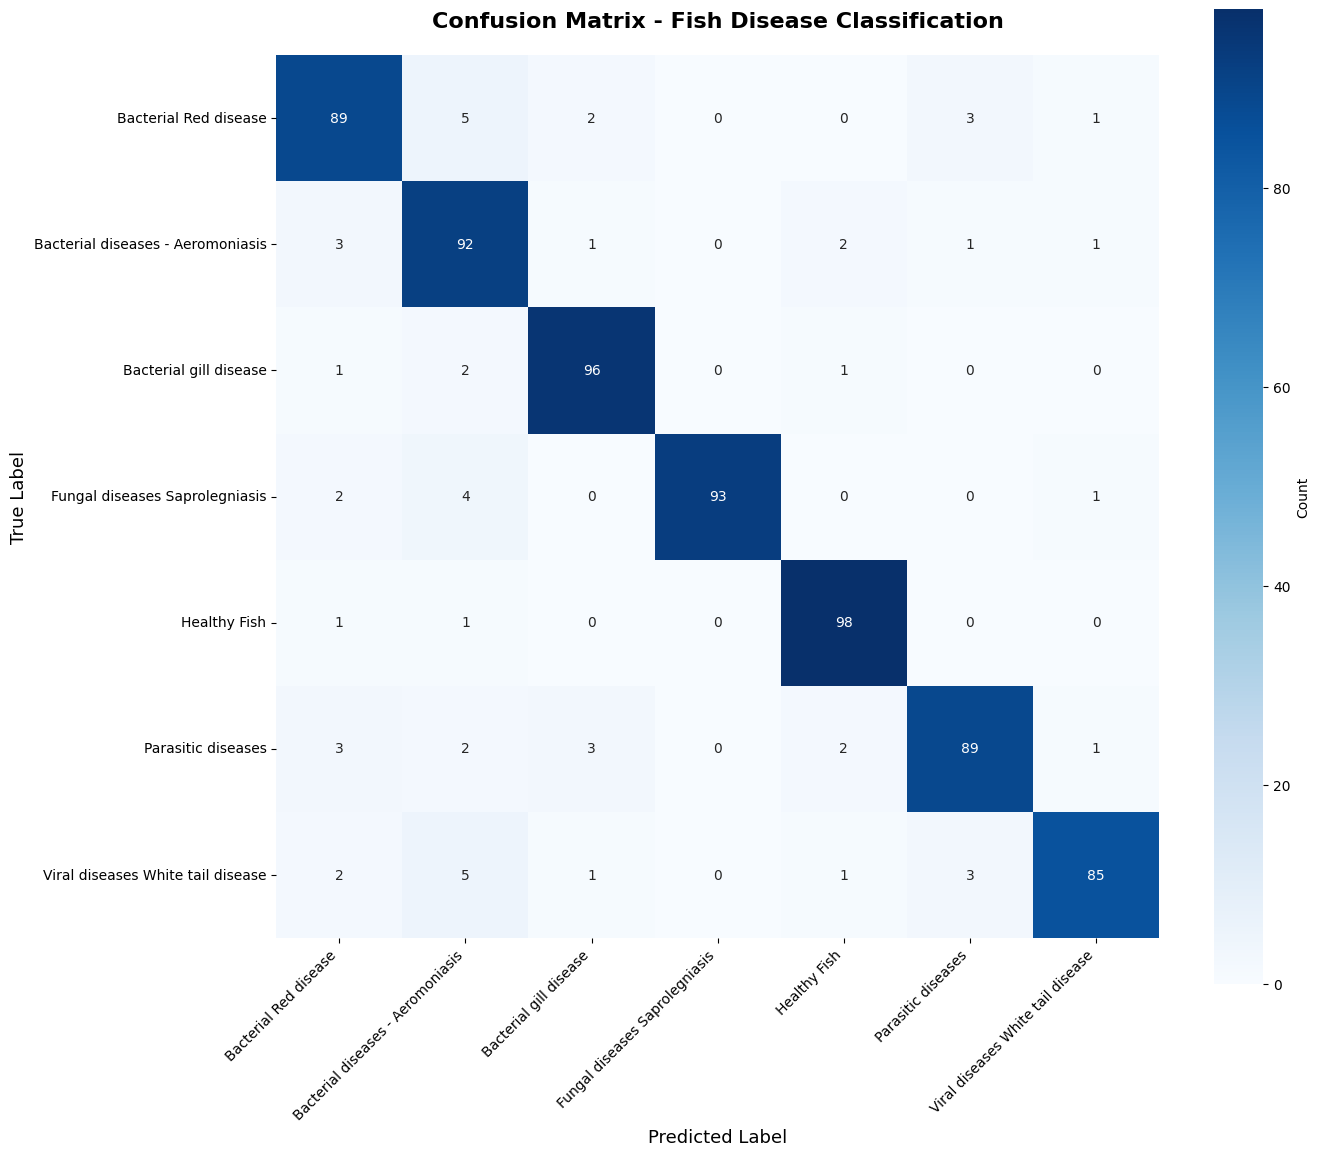


✅ Confusion matrix saved to 'results\confusion_matrix.png'

PER-CLASS ACCURACY
Bacterial Red disease         : 0.8900 (89.00%)
Bacterial diseases - Aeromoniasis: 0.9200 (92.00%)
Bacterial gill disease        : 0.9600 (96.00%)
Fungal diseases Saprolegniasis: 0.9300 (93.00%)
Healthy Fish                  : 0.9800 (98.00%)
Parasitic diseases            : 0.8900 (89.00%)
Viral diseases White tail disease: 0.8763 (87.63%)


In [26]:
print("\n" + "="*70)
print("CREATING CONFUSION MATRIX")
print("="*70)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(14, 12))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues',
    xticklabels=class_labels,
    yticklabels=class_labels,
    cbar_kws={'label': 'Count'},
    square=True
)
plt.title('Confusion Matrix - Fish Disease Classification', 
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('True Label', fontsize=13)
plt.xlabel('Predicted Label', fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

cm_path = os.path.join(RESULTS_DIR, 'confusion_matrix.png')
plt.savefig(cm_path, dpi=150, bbox_inches='tight')
plt.show()

print(f"\n✅ Confusion matrix saved to '{cm_path}'")

# Calculate per-class accuracy
print("\n" + "="*70)
print("PER-CLASS ACCURACY")
print("="*70)
for i, class_name in enumerate(class_labels):
    class_accuracy = cm[i, i] / cm[i, :].sum()
    print(f"{class_name:30s}: {class_accuracy:.4f} ({class_accuracy*100:.2f}%)")

In [29]:
print("\n" + "="*70)
print("SAVING FINAL MODEL")
print("="*70)

# Save complete model in different formats

# 1. Keras native format (recommended for Keras 3.x)
keras_model_path = os.path.join(MODEL_DIR, 'fish_disease_model.keras')
model.save(keras_model_path)
print(f" Model saved in Keras format: '{keras_model_path}'")

# 2. H5 format (legacy, but widely compatible)
h5_model_path = os.path.join(MODEL_DIR, 'fish_disease_model.h5')
model.save(h5_model_path)
print(f" Model saved in H5 format: '{h5_model_path}'")

# 3. TensorFlow SavedModel format (for TFLite/TFServing)
saved_model_path = os.path.join(MODEL_DIR, 'fish_disease_savedmodel')
model.export(saved_model_path)
print(f" Model exported in SavedModel format: '{saved_model_path}'")

# 4. Save model weights only (note the .weights.h5 extension)
weights_path = os.path.join(MODEL_DIR, 'model.weights.h5')
model.save_weights(weights_path)
print(f" Model weights saved: '{weights_path}'")

# 5. Save model architecture as JSON
try:
    model_json = model.to_json()
    json_path = os.path.join(MODEL_DIR, 'model_architecture.json')
    with open(json_path, 'w') as f:
        f.write(model_json)
    print(f" Model architecture saved: '{json_path}'")
except Exception as e:
    print(f"  Could not save architecture as JSON (Keras 3.x limitation): {e}")
    json_path = None

# Save training configuration
config = {
    'img_size': IMG_SIZE,
    'batch_size': BATCH_SIZE,
    'num_classes': NUM_CLASSES,
    'class_names': class_names,
    'epochs_phase1': EPOCHS_PHASE1,
    'epochs_phase2': EPOCHS_PHASE2,
    'learning_rate_phase1': LEARNING_RATE_PHASE1,
    'learning_rate_phase2': LEARNING_RATE_PHASE2,
    'base_model': 'MobileNetV2',
    'input_shape': [*IMG_SIZE, 3]
}

config_path = os.path.join(MODEL_DIR, 'model_config.json')
with open(config_path, 'w') as f:
    json.dump(config, f, indent=4)
print(f" Model configuration saved: '{config_path}'")

print("\n" + "="*70)
print("ALL MODEL FILES SAVED SUCCESSFULLY!")
print("="*70)
print("\nFor your dashboard, use:")
print(f"  • Keras format (recommended): '{keras_model_path}'")
print(f"  • H5 format (compatible): '{h5_model_path}'")
print(f"  • SavedModel (TF serving): '{saved_model_path}'")
print(f"  • Class mapping: '{class_indices_path}'")
print(f"  • Configuration: '{config_path}'")


SAVING FINAL MODEL


 Model saved in Keras format: 'saved_models\fish_disease_model.keras'
 Model saved in H5 format: 'saved_models\fish_disease_model.h5'
INFO:tensorflow:Assets written to: saved_models\fish_disease_savedmodel\assets


INFO:tensorflow:Assets written to: saved_models\fish_disease_savedmodel\assets


Saved artifact at 'saved_models\fish_disease_savedmodel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_154')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  2104074358608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2104074360720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2104074361104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2104074360336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2104074358224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2104074360912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2104074361296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2104074362064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2104074361680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2104074359376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2104074359